# Libraries and Datasets
in this part we import libraries and load Dataset of Question 6 of HW5-ML

In [1]:
!unzip Q6_Dataset.zip

Archive:  Q6_Dataset.zip
   creating: Q6_Dataset/
   creating: Q6_Dataset/Images/
  inflating: Q6_Dataset/Images/1.jpg  
  inflating: Q6_Dataset/Images/c1.jpg  
  inflating: Q6_Dataset/Images/c10.jpg  
  inflating: Q6_Dataset/Images/c11.jpg  
  inflating: Q6_Dataset/Images/c12.jpg  
  inflating: Q6_Dataset/Images/c13.jpg  
  inflating: Q6_Dataset/Images/c14.jpg  
  inflating: Q6_Dataset/Images/c15.jpg  
  inflating: Q6_Dataset/Images/c16.jpg  
  inflating: Q6_Dataset/Images/c17.jpg  
  inflating: Q6_Dataset/Images/c18.jpg  
  inflating: Q6_Dataset/Images/c19.jpg  
  inflating: Q6_Dataset/Images/c2.jpg  
  inflating: Q6_Dataset/Images/c20.jpg  
  inflating: Q6_Dataset/Images/c21.jpg  
  inflating: Q6_Dataset/Images/c22.jpg  
  inflating: Q6_Dataset/Images/c23.jpg  
  inflating: Q6_Dataset/Images/c24.jpg  
  inflating: Q6_Dataset/Images/c25.jpg  
  inflating: Q6_Dataset/Images/c26.jpg  
  inflating: Q6_Dataset/Images/c27.jpg  
  inflating: Q6_Dataset/Images/c28.jpg  
  inflating: Q6_Data

**Import libraries**

In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from sklearn.model_selection import LeaveOneOut

# Classification Using EM

**load data and find feature**

In [2]:
%cd Q6_Dataset/Images

/content/Q6_Dataset/Images


In [9]:
# Step 1: Load and Process the Data
data_directory = "./"

labels = []
features = []

for filename in os.listdir(data_directory):
    if filename.lower().startswith('c'):
        labels.append(0)  # Chelsea label
    elif filename.lower().startswith('m'):
        labels.append(1)  # Manchester label
    else:
        continue  # Skip files that don't match the required format

    image_path = os.path.join(data_directory, filename)
    image = plt.imread(image_path)
    r_mean = np.mean(image[:, :, 0])  # Mean of Red channel values
    b_mean = np.mean(image[:, :, 2])  # Mean of Blue channel values
    features.append([r_mean, b_mean])

labels = np.array(labels)
features = np.array(features)

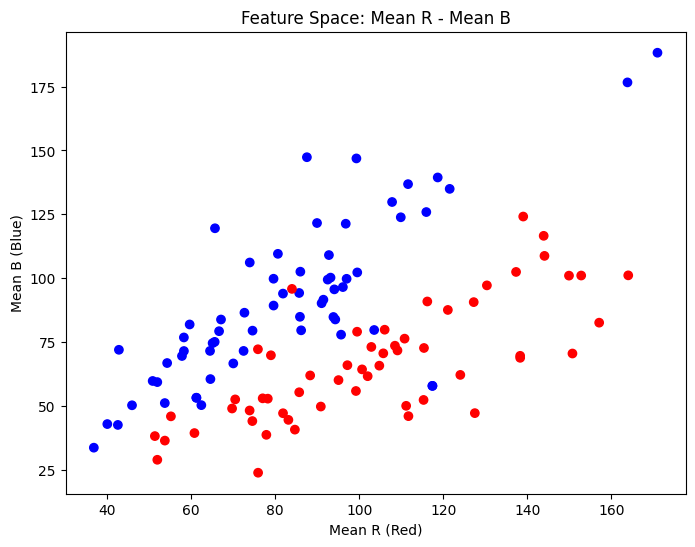

In [10]:
# Step 2: Plotting the Data
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in labels]
plt.scatter(features[:, 0], features[:, 1], c=colors)
plt.xlabel('Mean R (Red)')
plt.ylabel('Mean B (Blue)')
plt.title('Feature Space: Mean R - Mean B')
plt.show()

GMM Parameters:
Component 1:
Mean: [77.7119139  63.88297216]
Covariance: [[479.54335265 153.32680407]
 [153.32680407 341.27168401]]
Weight: 0.5333754854713472

Component 2:
Mean: [108.78462184  96.44794159]
Covariance: [[813.35066883 273.7337986 ]
 [273.7337986  997.6403329 ]]
Weight: 0.46662451452865283



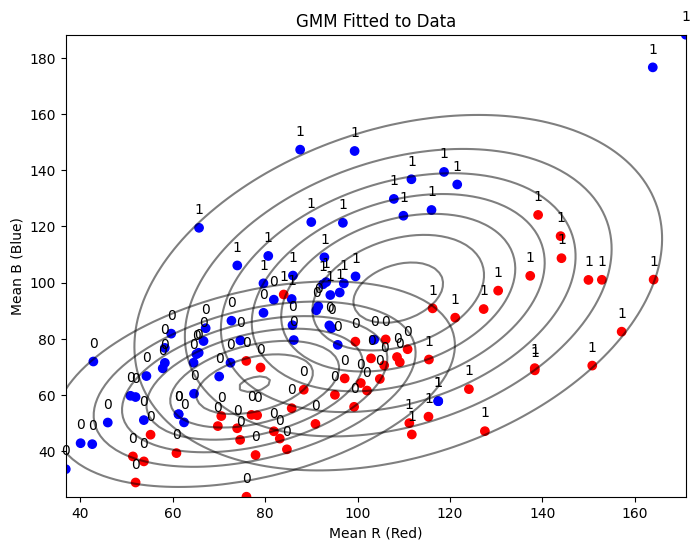

In [15]:
# Implement the EM Algorithm for GMM
k = 2  # Number of components

gmm = GaussianMixture(n_components=k)
gmm.fit(features)

# Report the Obtained Parameters
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

print("GMM Parameters:")
for i in range(k):
    print(f"Component {i+1}:")
    print("Mean:", means[i])
    print("Covariance:", covariances[i])
    print("Weight:", weights[i])
    print()

# Plotting the Results
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=colors)

# Plot the contours of the GMM models fitted to each class
for i in range(k):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    plt.contour(X, Y, multivariate_normal(mean, cov).pdf(np.dstack((X, Y))), colors='black', alpha=0.5)

# Assign data points to clusters based on the highest probability
cluster_labels = gmm.predict(features)
for i, label in enumerate(cluster_labels):
    plt.annotate(str(label), (features[i, 0], features[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Mean R (Red)')
plt.ylabel('Mean B (Blue)')
plt.title('GMM Fitted to Data')
plt.show()

In [32]:
# Find Optimal k using Leave-One-Out Cross-Validation
max_k = 10  # Maximum value of k to consider
cv_scores = []  # To store the cross-validation scores for each value of k

for k in range(1, max_k+1):
    gmm = GaussianMixture(n_components=k)
    loo = LeaveOneOut()

    scores = []
    for train_index, test_index in loo.split(features):
        train_data, test_data = features[train_index], features[test_index]
        gmm.fit(train_data)
        score = gmm.score(test_data)
        scores.append(score)

    cv_scores.append(np.mean(scores))

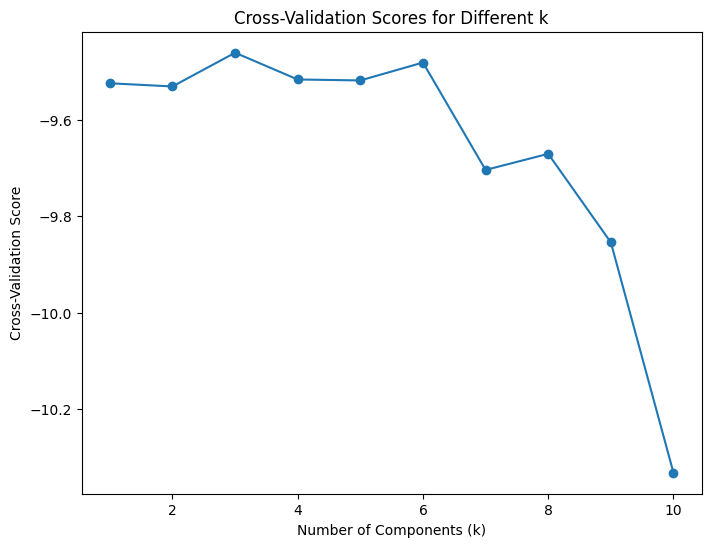

In [33]:
# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k+1), cv_scores, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different k')
plt.show()


In [34]:
# Choose Optimal k based on Cross-Validation Scores
optimal_k = np.argmax(cv_scores) + 1
print("Optimal k:", optimal_k)

Optimal k: 3


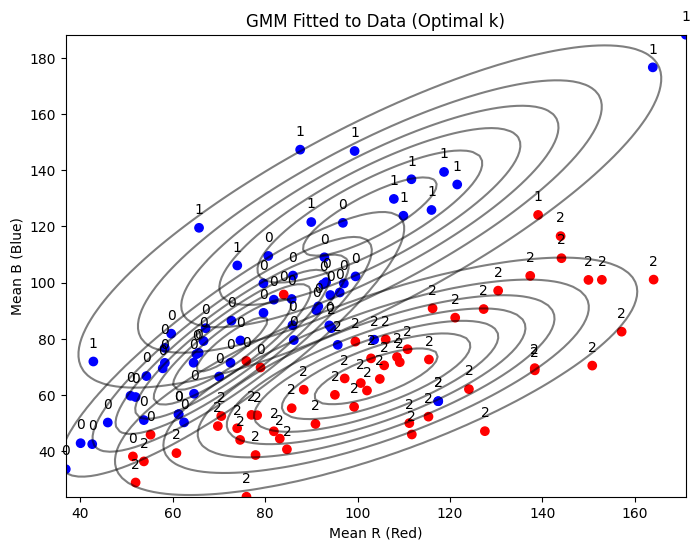

In [35]:
# Fit GMM with Optimal k and Plot Results
gmm_optimal = GaussianMixture(n_components=optimal_k)
gmm_optimal.fit(features)

plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=colors)

# Plot the contours of the GMM models fitted to each class
for i in range(optimal_k):
    mean = gmm_optimal.means_[i]
    cov = gmm_optimal.covariances_[i]
    plt.contour(X, Y, multivariate_normal(mean, cov).pdf(np.dstack((X, Y))), colors='black', alpha=0.5)

# Assign data points to clusters based on the highest probability
cluster_labels = gmm_optimal.predict(features)
for i, label in enumerate(cluster_labels):
    plt.annotate(str(label), (features[i, 0], features[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Mean R (Red)')
plt.ylabel('Mean B (Blue)')
plt.title('GMM Fitted to Data (Optimal k)')
plt.show()